# Importando Base de Dados

In [3]:
import pandas as pd

In [4]:
dados = pd.read_csv('./tips.csv')
dados

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


# Tradução de Dados

In [5]:
type(dados)

pandas.core.frame.DataFrame

In [6]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [7]:
renomear = {
    'total_bill' : 'valor_da_conta',
    'tip' : 'gorjeta',
    'dessert' : 'sobremesa',
    'day' : 'dia_da_semana',
    'time' : 'hora_do_dia',
    'size' : 'total_de_pessoas'
}
renomear

{'total_bill': 'valor_da_conta',
 'tip': 'gorjeta',
 'dessert': 'sobremesa',
 'day': 'dia_da_semana',
 'time': 'hora_do_dia',
 'size': 'total_de_pessoas'}

In [8]:
gorjetas = dados.rename(columns = renomear)
gorjetas.head(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [9]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [10]:
sim_nao = {
    'No' : 'Não',
    'Yes' : 'Sim'
}
sim_nao

{'No': 'Não', 'Yes': 'Sim'}

In [11]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [12]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [13]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [14]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [15]:
gorjetas['dia_da_semana'].drop_duplicates()

0      Sun
19     Sat
77    Thur
90     Fri
Name: dia_da_semana, dtype: object

In [16]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [17]:
dias = {
    'Sun' : 'Domingo',
    'Sat' : 'Sábado',
    'Thur' : 'Quinta',
    'Fri' : 'Sexta'
}

In [18]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [19]:
gorjetas.head(100)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4
...,...,...,...,...,...,...
95,40.17,4.73,Sim,Sexta,Dinner,4
96,27.28,4.00,Sim,Sexta,Dinner,2
97,12.03,1.50,Sim,Sexta,Dinner,2
98,21.01,3.00,Sim,Sexta,Dinner,2


In [20]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

In [21]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [22]:
hora = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [23]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [24]:
gorjetas.head(100)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4
...,...,...,...,...,...,...
95,40.17,4.73,Sim,Sexta,Jantar,4
96,27.28,4.00,Sim,Sexta,Jantar,2
97,12.03,1.50,Sim,Sexta,Jantar,2
98,21.01,3.00,Sim,Sexta,Jantar,2


# Comandos Extras

In [25]:
# Exibir as 5 ultimas linhas do DataFrame:
gorjetas.tail()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
239,29.03,5.92,Não,Sábado,Jantar,3
240,27.18,2.00,Sim,Sábado,Jantar,2
241,22.67,2.00,Sim,Sábado,Jantar,2
242,17.82,1.75,Não,Sábado,Jantar,2
243,18.78,3.00,Não,Quinta,Jantar,2


In [26]:
#  gorjetas.drop('day', axis=1)
#  Acima Deleta a coluna indicada
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

In [27]:
# 244 linhas e 6 colunas
gorjetas.shape

(244, 6)

In [28]:
gorjetas.shape[0]

244

In [29]:
gorjetas.shape[1]

6

# Pandas e Seaborn

In [30]:
# !pip install seaborn=0.9.0 para colab
import seaborn as sns

##### Análise 1 - Valor da Conta e Gorjeta

<AxesSubplot: xlabel='valor_da_conta', ylabel='gorjeta'>

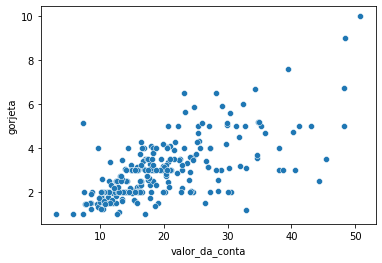

In [31]:
sns.scatterplot(x= 'valor_da_conta', y= 'gorjeta', data=gorjetas)

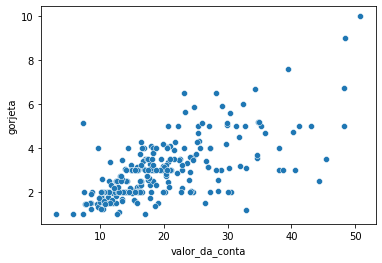

In [32]:
valor_gorjeta = sns.scatterplot(x= 'valor_da_conta', y= 'gorjeta', data=gorjetas)

In [33]:
print('A base de dados contém {} registros'.format(gorjetas.shape[0]))

A base de dados contém 244 registros


In [34]:
gorjetas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valor_da_conta    244 non-null    float64
 1   gorjeta           244 non-null    float64
 2   sobremesa         244 non-null    object 
 3   dia_da_semana     244 non-null    object 
 4   hora_do_dia       244 non-null    object 
 5   total_de_pessoas  244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


In [35]:
print('A base de dados contém {} registros \n'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros 

Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

##### Análise 2 - Criando Campo Porcentagem

In [36]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [37]:
# gorjetas['porcentagem'] isso inclui mais uma coluna / campo de informações
# gorjetas['porcentagem'] = (gorjetas['gorjeta'] / gorjetas['valor_da_conta']) * 100
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [38]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)
gorjetas.head(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


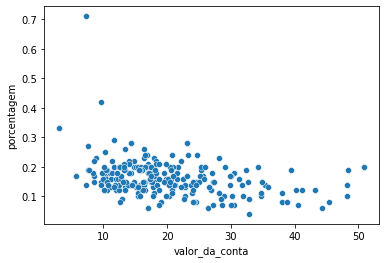

In [39]:
# proporcionalmente o valor da conta não é proporcional ao valor da gorjeta
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

##### Análise 3 - Replot e lmplot

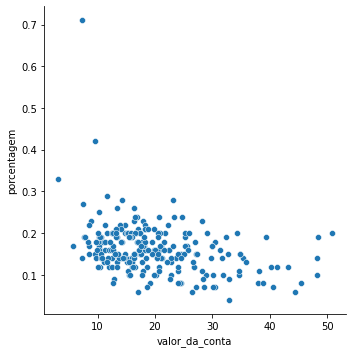

In [40]:
# relplot faz um gráfico em formato de linha
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

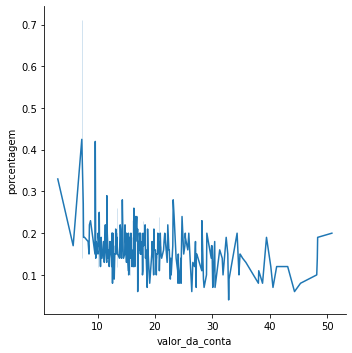

In [41]:
# porém devemos usar o parâmetro kind='line'
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

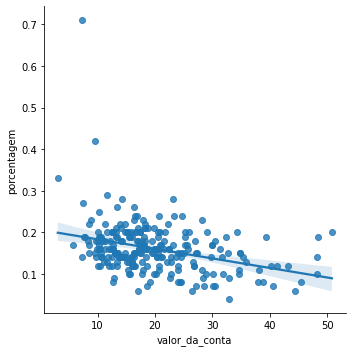

In [42]:
# é um scatterplot, mas com uma linha indicativa, onde podemos ver que quanto maior o valor da conta menor é percentual da gorjeta
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

In [43]:
boletim = ({
    'Aluno' : ['Márcia', 'Lucas', 'Ana', 'Flávio'],
    'Nota_1' : [10, 8, 5, 4],
    'Nota_2' : [7, 4, 8, 5],
    'Nota_3' : [6, 7, 4, 9]
})
boletim = pd.DataFrame(boletim)
boletim

,Aluno,Nota_1,Nota_2,Nota_3
0,Márcia,10,7,6
1,Lucas,8,4,7
2,Ana,5,8,4
3,Flávio,4,5,9


In [44]:
boletim['Média'] = ((boletim.Nota_1 + boletim.Nota_2 + boletim.Nota_3) / 3).round(2)
boletim

,Aluno,Nota_1,Nota_2,Nota_3,Média
0,Márcia,10,7,6,7.67
1,Lucas,8,4,7,6.33
2,Ana,5,8,4,5.67
3,Flávio,4,5,9,6.00


#### Extra - Plots

[Text(0.5, 0, 'Valor da conta'), Text(0, 0.5, 'Valor da gorjeta')]

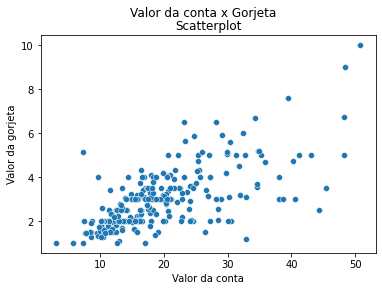

In [45]:
primeiro_plot = sns.scatterplot(x='total_bill', y='tip', data=dados)
primeiro_plot.figure.suptitle('Valor da conta x Gorjeta')
primeiro_plot.set_title('Scatterplot')
primeiro_plot.set(xlabel='Valor da conta', ylabel='Valor da gorjeta')
# imagem = primeiro_plot.get_figure()
# imagem.savefig('/scatterplot.png')

#### Análise 4 - Sobremesas - Catplot - Replot - Implot

In [46]:
gorjetas.head(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [47]:
gorjetas[gorjetas.sobremesa == 'Sim']
# gorjetas[gorjetas.sobremesa == 'Sim']['sobremesa']
# sobre1 = pd.DataFrame(gorjetas[gorjetas.sobremesa == 'Sim'])
# sobre2 = pd.Series(gorjetas[gorjetas.sobremesa == 'Sim']['sobremesa'])
# sobre2
# sobre1

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
56,38.01,3.00,Sim,Sábado,Jantar,4,0.08
58,11.24,1.76,Sim,Sábado,Jantar,2,0.16
60,20.29,3.21,Sim,Sábado,Jantar,2,0.16
61,13.81,2.00,Sim,Sábado,Jantar,2,0.14
62,11.02,1.98,Sim,Sábado,Jantar,2,0.18
...,...,...,...,...,...,...,...
234,15.53,3.00,Sim,Sábado,Jantar,2,0.19
236,12.60,1.00,Sim,Sábado,Jantar,2,0.08
237,32.83,1.17,Sim,Sábado,Jantar,2,0.04
240,27.18,2.00,Sim,Sábado,Jantar,2,0.07


In [48]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [49]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


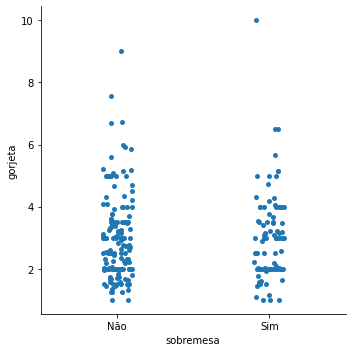

In [50]:
# gráfico categórico
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

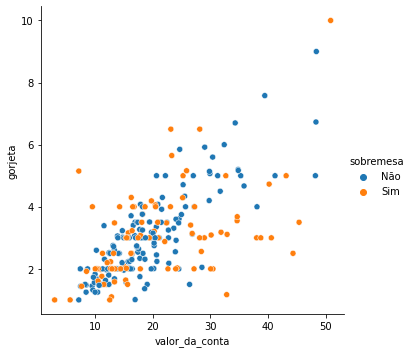

In [51]:
# identificar quem pediu e não pediu sobremesa
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

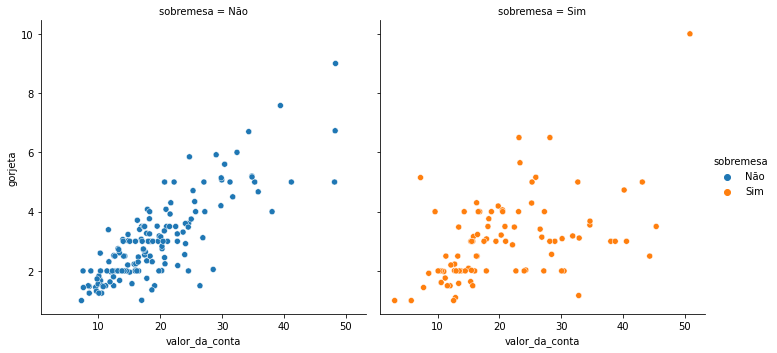

In [52]:
# identificar quem pediu e não pediu sobremesa com colunas separadas
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

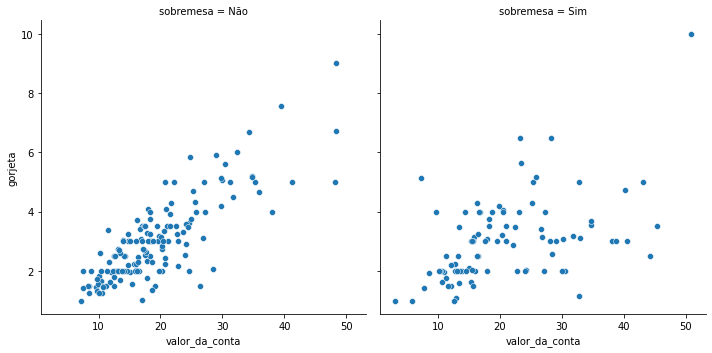

In [53]:
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', data=gorjetas)

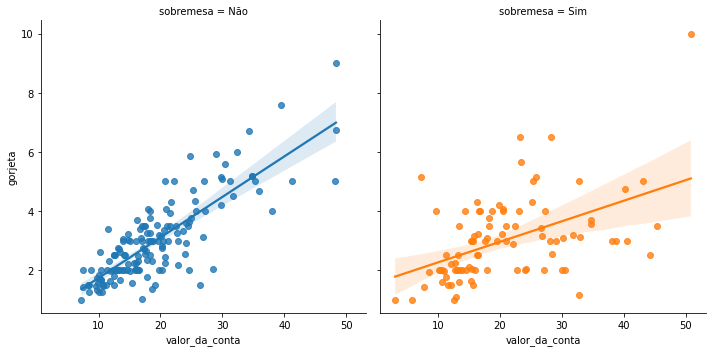

In [54]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

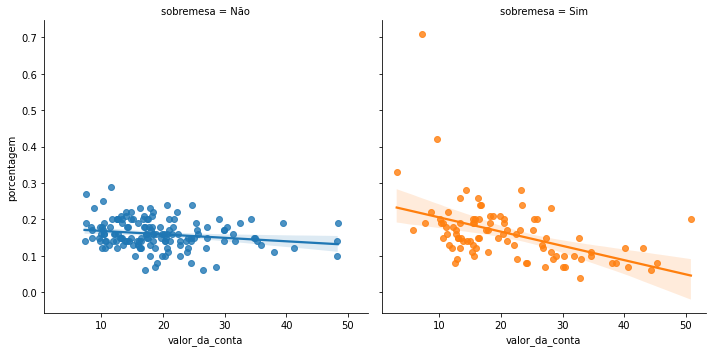

In [55]:
# quem pedi sobremesa o percentual da gorjeta é BEM MENOR daqueles que não pedem
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

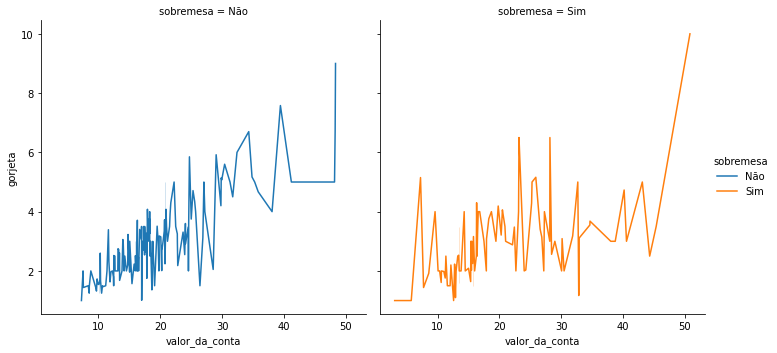

In [56]:
# podemos notar que quem NÃO pedi sobremesa o valor da gorjeta é um pouco maior
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', kind='line', data=gorjetas)

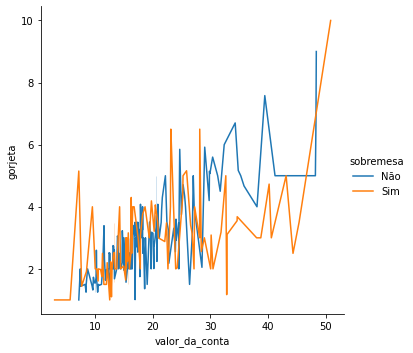

In [57]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', kind='line', data=gorjetas)

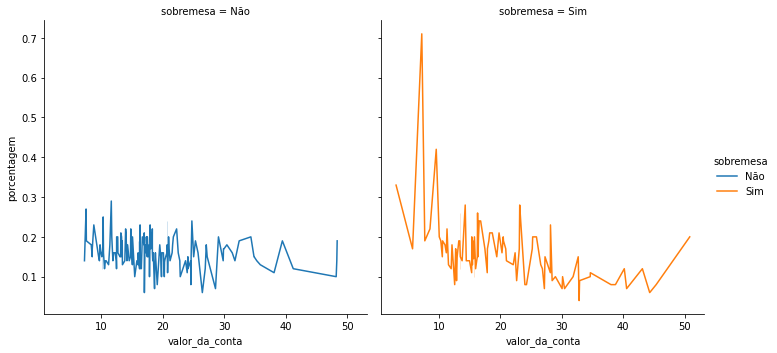

In [58]:
sns.relplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', kind='line', data=gorjetas)

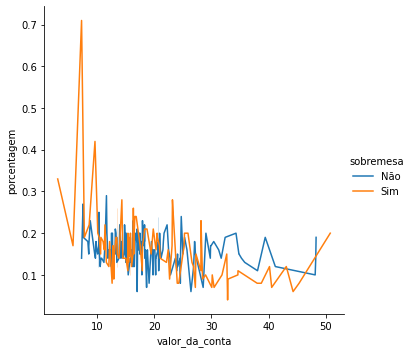

In [59]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', kind='line', data=gorjetas)

#### Análise 5 - Sobremesas - Testes de Hipóteses

**H<sup>null</sup>**
**Nossa hipótese nula pressupõe que a distribuição da gorjeta é igual nos dois grupos.**

*pelo ranksums a hipótese correta é a NULA*

**H<sup>alt</sup>**
**Nossa hipótese alternativa pressupõe que a distribuição da gorjeta NÃO é igual nos dois grupos.**

In [60]:
from scipy.stats import ranksums

In [61]:
gorjetas.query("sobremesa == 'Sim'").porcentagem

56     0.08
58     0.16
60     0.16
61     0.14
62     0.18
       ... 
234    0.19
236    0.08
237    0.04
240    0.07
241    0.09
Name: porcentagem, Length: 93, dtype: float64

In [66]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem
sobremesa

56     0.08
58     0.16
60     0.16
61     0.14
62     0.18
       ... 
234    0.19
236    0.08
237    0.04
240    0.07
241    0.09
Name: porcentagem, Length: 93, dtype: float64

In [69]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem
sem_sobremesa

0      0.06
1      0.16
2      0.17
3      0.14
4      0.15
       ... 
235    0.12
238    0.13
239    0.20
242    0.10
243    0.16
Name: porcentagem, Length: 151, dtype: float64

In [70]:
ranksums(sobremesa, sem_sobremesa)

RanksumsResult(statistic=-0.6331073145314825, pvalue=0.5266635660124415)

In [73]:
r = ranksums(sobremesa, sem_sobremesa)
print('O valor do p-value é {}'.format(r.pvalue))
print('O p-value representa a probabilidade daquela amostra ter acontecido dentro da população. Se a chance é pequena, geralmente p-value < 0,05, representa que um evento muito raro aconteceu, então optamos por descartar a hipótese nula, e dizer que ela pode não ser verdade.')

O valor do p-value é 0.5266635660124415
O p-value representa a probabilidade daquela amostra ter acontecido dentro da população. Se a chance é pequena, geralmente p-value < 0,05, representa que um evento muito raro aconteceu, então optamos por descartar a hipótese nula, e dizer que ela pode não ser verdade.


#### Análise 6 - 

In [ ]:
import pandas as pd